# 영상 처리

## 이미지

### 이미지 불러오기

In [2]:
import cv2

In [5]:
img = cv2.imread('images/lena.jpg', cv2.IMREAD_COLOR) # color가 기본값

In [7]:
img.shape # OpenCV는 channel Last 형식

(512, 512, 3)

In [9]:
type(img)

numpy.ndarray

In [8]:
img = cv2.imread('images/lena.jpg', cv2.IMREAD_GRAYSCALE)
print(img.shape)

(512, 512)


### 이미지 출력하기

In [12]:
# 이미지 윈도우 창으로 띄우기
cv2.imshow('Lena',img)
cv2.waitKey()
cv2.destroyAllWindows()

AttributeError: module 'cv2' has no attribute 'destroyAllwindows'

In [1]:
import cv2
fname='images/lena.jpg'
color = cv2.imread(fname, cv2.IMREAD_COLOR)
grayscale = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
unchanged = cv2.imread(fname, cv2.IMREAD_UNCHANGED)

cv2.imshow('Color', color)
cv2.imshow('Grayscale', grayscale)
cv2.imshow('Unchanged', unchanged)

cv2.waitKey()
cv2.destroyAllWindows()

### 이미지 저장하기

In [ ]:
img = cv2.imread('images/lena.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('lenagray.png',img)

### matplotlib 사용해서 이미지 출력

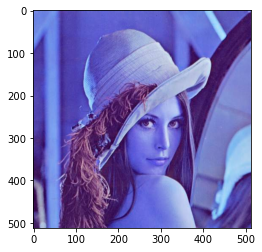

In [3]:
from matplotlib import pyplot as plt

img = cv2.imread('images/lena.jpg', cv2.IMREAD_COLOR)

plt.imshow(img)
plt.show()

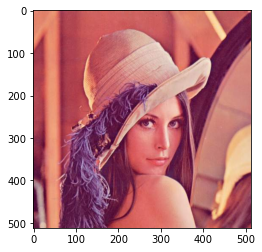

In [4]:
# opencv 는 bgr로 채널이 되있음 그러므로 r,g,b로 변환
img = cv2.imread('images/lena.jpg', cv2.IMREAD_COLOR)

b,g,r = cv2.split(img)
img2 = cv2.merge([r,g,b]) # img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img2)
plt.show() #다음 코드를 한줄로 plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### 컬러 이미지 회색조로 변경하는 방법 계산해보기

In [5]:
lena_img = cv2.imread('images/lena.jpg')
B, G, R = lena_img[0][0]
print('컬러 화소', lena_img[0][0])
print('YPrPb', 0.114*B + 0.587*G + 0.299*R)
print('YCrCb', 0.0722*B+0.7152*G+0.2116*R)
lena_gray = cv2.imread('images/lena.jpg', cv2.IMREAD_GRAYSCALE)
print('그레이스케일 화소', lena_gray[0][0])

컬러 화소 [127 136 226]
YPrPb 161.884
YCrCb 154.2582
그레이스케일 화소 162


## 동영상 처리하기

### 비디오 객체 생성하고 읽기

In [1]:
import cv2
cap = cv2.VideoCapture('images/Puppies-HD.mp4')

if cap.isOpened():
    delay = int(1000 / cap.get(cv2.CAP_PROP_FPS))
    while True:
        ret, img = cap.read()
        if ret:
            cv2.imshow('Movie', img)
            if cv2.waitKey(delay) & 0xFF ==27:
                print('ESC Key pressed')
                break
        else:
            print(ret, img)
            break
else:
    print('File not opened')

ESC Key pressed


### usb 캠 연동해서 보기

In [2]:
import cv2 
cap = cv2.VideoCapture(0)

if cap.isOpened():
    delay = int(1000/cap.get(cv2.CAP_PROP_FPS))
    while True:
        ret, img = cap.read()
        if ret:
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            cv2.imshow('Movie', img_gray)
            if cv2.waitKey(delay) & 0xFF == 27:
                print('ESC Key pressed')
                break
        else:
            print(ret, img)
            break
else:
    print('File not opened')

cap.release()
cv2.destroyAllWindows()

ESC Key pressed


### usb 캠 동영상 속성 정보 변경

In [3]:
import cv2

cap = cv2.VideoCapture(0)
print(cap.get(cv2.CAP_PROP_FRAME_WIDTH),
     cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
cap.set(cv2.CAP_PROP_FRAME_WIDTH,320)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT,240)
print(cap.get(cv2.CAP_PROP_FRAME_WIDTH),
     cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

if cap.isOpened():
    delay = int(1000/ cap.get(cv2.CAP_PROP_FPS))

640.0 480.0
320.0 240.0


### 비디오 저장하기

In [1]:
import cv2
cap = cv2.VideoCapture(0)

if cap.isOpened():
    fourcc = cv2.VideoWriter_fourcc(*'DIVX')
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    size = (int(width), int(height))
    fps = cap.get(cv2.CAP_PROP_FPS)
    out = cv2.VideoWriter('video.avi', fourcc, fps, size)
    
    delay = int(1000/cap.get(cv2.CAP_PROP_FPS))
    while True:
        ret, img = cap.read()
        if ret:
            gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            cv2.imshow('Puppy', gray)
            out.write(cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR))
            if cv2.waitKey(delay) & 0xFF == 27:
                print('ESC Key pressed')
                break

ESC Key pressed


In [1]:
# 저장한 동영상 재생
import cv2
cap = cv2.VideoCapture('video.avi')

if cap.isOpened():
    delay = int(1000 / cap.get(cv2.CAP_PROP_FPS))
    while True:
        ret, img = cap.read()
        if ret:
            cv2.imshow('Movie', img)
            if cv2.waitKey(delay) & 0xFF ==27:
                print('ESC Key pressed')
                break
        else:
            print(ret, img)
            break
else:
    print('File not opened')

ESC Key pressed


## 이벤트 처리하기

In [24]:
#마우스 클릭하는 순간 프레임을 저장
import cv2 
import numpy as np
from datetime import datetime

def mouseHandler(event, x, y, flags, param):
    if event==cv2.EVENT_LBUTTONDOWN:
        print(event, x, y)
        print(datetime.today())
        filename = str(datetime.today().microsecond)+'.jpg'
        cv2.imwrite(filename, img)
cv2.namedWindow('Camera')
cv2.setMouseCallback('Camera', mouseHandler)

cap = cv2.VideoCapture(0)

img = None

if cap.isOpened():
    delay = int(1000 / cap.get(cv2.CAP_PROP_FPS))
    while True:
        ret, img = cap.read()
        if ret:
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            cv2.imshow('Camera', img_gray)
            if cv2.waitKey(delay) & 0xFF ==27:
                print('ESC key pressed')
                break
        else:
            print(ret, img)
            break
else:
    print('camera not opened')
    
cap.release()
cv2.destroyAllWindows()

1 395 316
2022-01-19 14:24:59.430967
ESC key pressed


In [ ]:
# 입력받은 값 출력하기
image = np.full((100,100,3), 255, np.uint8)

while(1):
    cv2.imshow('Key test',image)
    key = cv2.waitKey(0)
    print(f'Code:{key}, char:{chr(key)}')
    if key & 0xFF ==27:
        break
cv2.destroyAllWindows()

In [29]:
# 입력에 따른 도형 그리기
import cv2
import numpy as np
def mouseHandler(event, x, y, flags, param):
    if event ==cv2.EVENT_LBUTTONDOWN:
        if flags & cv2.EVENT_FLAG_CTRLKEY:
            cv2.rectangle(img, (x,y), (x+20,y+20), (0,0,255),-1)
        else:
            cv2.rectangle(img, (x,y), (x+20,y+20), (0,255,0), 2)
    elif event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(img, (x,y), 10, (255,0,0), 2)
    elif event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img, (x,y), 20, (255,0,0), -1)

img = np.full((512,512,3),255, dtype=np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image', mouseHandler)

while(1):
    cv2.imshow('image', img)
    if cv2.waitKey(20) & 0xFF ==27:
        break
cv2.destroyAllWindows()

In [31]:
# 트랙 바 사용하기
import cv2
import numpy as np

img = np.zeros((200,500,3), np.uint8)
cv2.namedWindow('image')

def set_background(x):
    global img
    r = cv2.getTrackbarPos('Red', 'image')
    g = cv2.getTrackbarPos('Green', 'image')
    b = cv2.getTrackbarPos('Blue', 'image')
    s = cv2.getTrackbarPos('0 or 1', 'image')
    if s ==0:
        img[:] =0
    else:
        img[:] = [b,g,r]

cv2.createTrackbar('Red', 'image', 0, 255, set_background)
cv2.createTrackbar('Green', 'image', 0, 255, set_background)
cv2.createTrackbar('Blue', 'image', 0, 255, set_background)
cv2.createTrackbar('0 or 1', 'image', 0, 1, set_background)

while(1):
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

TypeError: set_background() takes 0 positional arguments but 1 was given

## 도형그리기

### 선 그리기

In [13]:
import cv2
import numpy as np
img = np.full((250,250,3),255, dtype=np.uint8)

cv2.line(img, (50,10), (200,10), (255,0,0), 1)
cv2.line(img, (50,60), (200,60), (0,255,0), 2)
cv2.line(img, (50,110), (200,110), (0,0,255), 3)
cv2.line(img, (50,160), (200,160), (0,255,0), 4)
cv2.line(img, (50,210), (200,210), (0,255,0), 6)
cv2.imshow('Lines', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 사각형 그리기

In [18]:
import cv2
import numpy as np

img = np.full((250,250,3), 255, dtype=np.uint8)

cv2.rectangle(img, (50,10), (200,50), (255,0,0),1)
cv2.rectangle(img, (50,60), (200,100), (255,0,0),2)
cv2.rectangle(img, (50,110), (200,150), (255,0,0),-2)
cv2.rectangle(img, (50,160), (200,200), (255,0,0),-1)
cv2.rectangle(img, (50,160), (200,200), (0,0,255),2)

cv2.imshow('rectangle', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 다각형 그리기

In [32]:
import cv2
import numpy as np

img = np.full((250, 250, 3), 255, dtype=np.uint8)
points = np.array([[60,60], [100,10], [200,60], [150,100],
[100, 100]], dtype=np.int32)

cv2.polylines(img, [points], True, (255, 0, 0), 5)
cv2.polylines(img, [points+[0,100]], False, (0, 0, 255), 10)

cv2.imshow('Polylines',img)
cv2.waitKey()
cv2.destroyAllWindows()

### 원 그리기

In [19]:
import cv2
import numpy as np

img = np.full((250, 250, 3), 255, dtype=np.uint8)

cv2.circle(img, (50, 50), 50, (255,0,0))
cv2.circle(img, (100,100), 50, (0,255,0), -1)
cv2.circle(img, (100,100), 100, (0,0,255), 5)
cv2.circle(img, (200,200), 50, (0,0,0), 5)

cv2.imshow('Circle', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 타원 호 그리기

In [21]:
import cv2
import numpy as np

img = np.full((250, 250, 3), 255, dtype=np.uint8)

cv2.ellipse(img, (60,60), (50,30), -30, 0, 360, (255,0,0), 2)
cv2.ellipse(img, (160,60), (50,30), 0, 0, 360, (255,0,0), 1)
cv2.ellipse(img, (60,160), (50,30), 30, 0, 180, (255,0,0), 2)
cv2.ellipse(img, (160,160), (50,30), 90, 180, 360, (255,0,0), -1)

cv2.imshow('ellipse', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

###  문자열 표시하기

In [5]:
import cv2
import numpy as np

img = np.full((250,250,3), (255,255,255), dtype=np.uint8)

cv2.putText(img, 'Hello Python', (10,50), cv2.FONT_ITALIC,1,(255,0,0))
cv2.putText(img, 'Hello Python', (10,80), cv2.FONT_ITALIC,0.5,(0,0,255))
cv2.putText(img, 'Hello Python', (10,150), cv2.FONT_ITALIC,2,(0,0,0))
cv2.putText(img, 'Hello Python', (10,200), cv2.FONT_ITALIC,1,(0,0,0))

cv2.imshow('Text', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 2장 기본 연산

## 이미지 연산

### 이미지 채널

In [7]:
img = cv2.imread('images/lena.jpg')
b,g,r = cv2.split(img)
print(np.mean(b), np.mean(g), np.mean(r), sep=', ')

105.54556274414062, 98.9676513671875, 180.31714248657227


In [8]:
img = cv2.imread('images/lena.jpg')
img[:, :, [0,1]] = 0

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 이미지 블랜딩(가중치를 주어 이미지 합치기)

In [9]:
import cv2
import numpy as np

def ez_blending(img1, img2, img1_weight=0.5):
    output = img1*img1_weight + img2*(1-img1_weight)
    return output.astype(np.uint8)

In [12]:
img1=cv2.imread('images/flower1.jpg')
img2=cv2.imread('images/flower2.jpg')
new_img = ez_blending(img1, img2, img1_weight=0.3)
cv2.imshow('img', new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 비트 연산

In [28]:
import cv2
import numpy as np

img1 = cv2.imread('images/logo.png')
img2 = cv2.imread('images/lena.jpg')

rows, cols, channels = img1.shape

roi = img2[0:rows, 0:cols]

img1gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img1gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

img1_fg = cv2.bitwise_and(img1, img1, mask=mask)
img2_bg = cv2.bitwise_and(roi,roi, mask=mask_inv)

dst = cv2.add(img1_fg, img2_bg)

img2[0:rows, 0:cols] = dst

cv2.imshow('res', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
cv2.imshow('image1', mask)
cv2.imshow('image2', mask_inv)
cv2.imshow('image3', img1_fg)
cv2.imshow('image4', img2_bg)
cv2.imshow('image5', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [35]:
#seamlessclone으로 자연스럽게 합치기
import cv2
import numpy as np

img1 = cv2.imread('images/logo.png')
img2 = cv2.imread('images/lena.jpg')

mask = np.full_like(img1,255)
height, width = img2.shape[:2]
center = (width//2, height//2)

normal = cv2.seamlessClone(img1, img2, mask, center, cv2.NORMAL_CLONE)
mixed = cv2.seamlessClone(img1, img2, mask, center, cv2.MIXED_CLONE)

cv2.imshow('normal', normal)
cv2.imshow('mixed', mixed)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [38]:
#seamlessclone 활용2
import cv2
import numpy as np

src = cv2.imread('images/airplane2.jpg')
dst = cv2.imread('images/red_sky.jpg')
src_mask = np.zeros(src.shape, src.dtype)
poly = np.array([[0,40], [150,60], [203,56], [200,100],
                [88,103], [1,75]], np.int32)
cv2.fillPoly(src_mask, [poly], (255,255,255))
center=(600,150)
output = cv2.seamlessClone(src, dst, src_mask, center,
                          cv2.NORMAL_CLONE)

cv2.imshow('Output', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

AttributeError: module 'cv2' has no attribute 'destroyWindows'

## 이진화

In [1]:
import cv2
import numpy as np

def two_tone(img, threshold=128):
    output = (img > threshold)*255
    return output.astype(np.uint8)

In [2]:
img = cv2.imread('./images/lena.jpg',0)
new_img = two_tone(img, threshold=120)
cv2.imwrite('./images/lena_bin.jpg', new_img)
cv2.imshow('img', new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

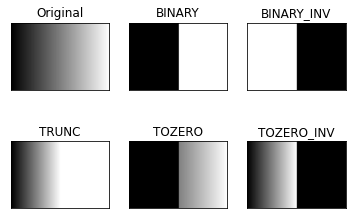

In [4]:
# threshold() 이진화 여러가지 방법 해보기
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/gradation.png',0)

ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles=['Original','BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    
plt.show()

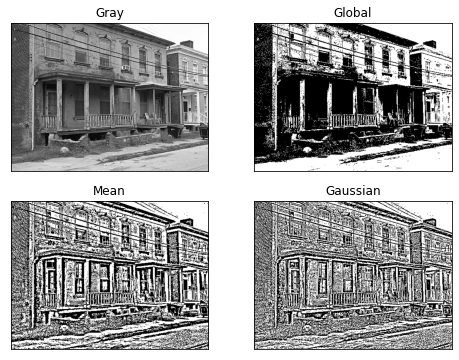

In [5]:
#적응 임계치
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_gray = cv2.imread('images/house.jpg',0)
_, img_bin = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
adt_mean = cv2.adaptiveThreshold(img_gray,255,
                                cv2.ADAPTIVE_THRESH_MEAN_C,
                                cv2.THRESH_BINARY, 15, 2)
adt_gaus = cv2.adaptiveThreshold(img_gray,255,
                                cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 15, 2)
titles = ['Gray', 'Global', 'Mean', 'Gaussian']
images=[img_gray, img_bin, adt_mean, adt_gaus]

plt.figure(figsize=(8,6))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

## 디더링

In [7]:
def minmax(pixel):
    if pixel > 255:
        pixel = 255
    if pixel < 0:
        pixel = 0
    return pixel

In [20]:
import numpy as np

def dithering(img):
    height, width = img.shape
    for y in range(0, height-1):
        for x in range(1, width-1):
            p = img[y,x]
            new_p = np.round(p/255)*255
            img[y,x] = new_p
            error = p-new_p
            img[y , x+1] = minmax(img[y , x+1] + error*7/16)
            img[y+1, x-1] = minmax(img[y+1, x-1] + error*3/16)
            img[y+1, x ] = minmax(img[y+1, x ] + error*5/16)
            img[y+1, x+1] = minmax(img[y+1, x+1] + error*1/16)
    return img

In [21]:
lena = cv2.imread('images/lena.jpg', cv2.IMREAD_GRAYSCALE)
lena_dithering = dithering(lena.copy())
cv2.imshow('Lena grayscale', lena)
cv2.imshow('Lena dithering', lena_dithering)
cv2.waitKey()
cv2.destroyAllWindows()

##  히스토그램

In [ ]:
import cv2
img = cv2.imread("images/couple256.jpg", flags=cv2.IMREAD_GRAYSCALE)

import numpy as np
hist = np.zeros((256))

height, width = img.shape

for y in range(height):
    for x in range(width):
        hist[img[y,x]] = hist[img[y,x]] + 1

import matplotlib.pyplot as plt
plt.bar(x=range(256), height=hist, width=1)
plt.show()

### 히스토그램 함수 구현

In [ ]:
# 그레이스케일 이미지를 입력받아 히스토그램을 계산하여 반환하는 함수

import numpy as np

def histogram(img):
    height, width = img.shape
    hist_ = np.zeros(256)
    
    for y in range(height):
        for x in range(width):
            hist_[img[y,x]] = hist_[img[y,x]] + 1
    
    return hist_

In [ ]:
import numpy as np

def histogram_img(hist):
    hist_height = 150
    hist_img = np.full((hist_height,256), 255, dtype=np.uint8)
    hist = hist.astype(int)
    hist_max = max(hist)
    
    for i, value in enumerate(hist):
        height = -int(value * (hist_height/hist_max))
        if height<-1:
            hist_img[height:,i] = 0
    
    return hist_img

In [ ]:
import cv2

img = cv2.imread("images/couple256.jpg", flags=cv2.IMREAD_GRAYSCALE)
hist = histogram(img)
hist_img = histogram_img(hist)

cv2.imshow('Histogram', hist_img)
cv2.waitKey()
cv2.destroyAllWindows()

### cv2.calcHist()

In [ ]:
import cv2
import matplotlib.pyplot as plt

lena_gray = cv2.imread("images/lena.jpg", 0)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.bar(x=range(256), height=histogram(lena_gray), width=1)

plt.subplot(122)
hist = cv2.calcHist(images=[lena_gray], channels=[0],
                    mask=None, histSize=[256], ranges=[0, 256])
plt.plot(hist.flatten())
plt.show()

In [ ]:
lena = cv2.imread("images/lena.jpg")

plt.figure(figsize=(12,4))
plt.subplot(131)
hist1 = cv2.calcHist(images=[lena], channels=[0], mask=None,
                     histSize=[256], ranges=[0,256])
plt.plot(hist1.flatten())

plt.subplot(132)
hist1 = cv2.calcHist(images=[lena], channels=[1], mask=None,
                     histSize=[256], ranges=[0,256])

plt.plot(hist.flatten())
plt.subplot(133)
hist1 = cv2.calcHist(images=[lena], channels=[2], mask=None,
                     histSize=[256], ranges=[0,256])
plt.plot(hist.flatten())

plt.show()

# 이미지 변환

## 크기 변환

In [25]:
import numpy as np

def scale_nogood(img, scale_x =1, scale_y=1):
    height, width = img.shape
    height_n, width_n = int(height*scale_y), int(width*scale_x)
    img_ = np.zeros((height_n,width_n), dtype=np.uint8)
    
    for y in range(height):
        for x in range(width):
            img_[int(y*scale_y),int(x*scale_x)]=img[y,x]
    return img_

In [26]:
import cv2
img = cv2.imread('images/lena.jpg', cv2.IMREAD_GRAYSCALE)

result = scale_nogood(img, 0.5, 0.5)

cv2.imshow('Origin',img)
cv2.imshow('Scale NG', result)
cv2.waitKey()
cv2.destroyAllWindows()

In [30]:
result.shape

(256, 256)

In [29]:
img.shape

(512, 512)